<a href="https://colab.research.google.com/github/KostyaKrechetov/Data-analysis-course-ITMO/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

data = pd.read_csv("/content/drive/My Drive/preprocessed.csv")

Mounted at /content/drive/


In [ ]:
# In this section, I add new predictor columns

hours = pd.to_datetime(data['Unnamed: 0']).dt.hour
data['hour'] = hours

dayofweek = pd.to_datetime(data['Unnamed: 0']).dt.dayofweek
data['dayofweek'] = dayofweek

month = pd.to_datetime(data['Unnamed: 0']).dt.month
data['month'] = month

weekofyear = pd.to_datetime(data['Unnamed: 0']).dt.weekofyear
data['weekofyear'] = weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if sys.path[0] == '':


In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17853 entries, 0 to 17852
Data columns (total 56 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   Unnamed: 0                                                                                                          17853 non-null  object 
 1   Temp                                                                                                                17848 non-null  float64
 2   Pressure                                                                                                            17850 non-null  float64
 3   Humidity                                                                                                            17840 non-null  float64
 4   Wind_mean       

In [ ]:
data.describe()

,Temp,Pressure,Humidity,Wind_mean,dead_count,injured_count,participants_count,light_dark_street_lights_on,light_dark_street_lights_off,light_dark_street_lights_absent,light_uknown,light_light_time,light_twilight,region_Адмиралтейский район,region_Василеостровский район,region_Выборгский район,region_Калининский район,region_Кировский район,region_Колпинский район,region_Красногвардейский район,region_Красносельский район,region_Кронштадтский район,region_Курортный район,region_Московский район,region_Невский район,region_Петроградский район,region_Петродворцовый район,region_Приморский район,region_Пушкинский район,region_Фрунзенский район,region_Центральный район,category_different,category_bycicle_hit,category_obstacle_hit,category_animal_hit,"category_Наезд на лицо, не являющееся участником дорожного движения, осуществляющее какую-либо другую деятельность","category_Наезд на лицо, не являющееся участником дорожного движения, осуществляющее несение службы","category_Наезд на лицо, не являющееся участником дорожного движения, осуществляющее производство работ",category_pedestrian_hit,category_Наезд на препятствие,category_Наезд на стоящее ТС,category_Опрокидывание,category_Отбрасывание предмета,category_Падение груза,category_Падение пассажира,category_car_collision,category_Съезд с дороги,severity_non_severe,severity_with_dead,severity_severe,number,hour,dayofweek,month,weekofyear
count,17848.000000,17850.000000,17840.000000,17818.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000,17853.000000
mean,6.949266,759.264207,75.144395,1.970872,0.093486,2.756960,5.646838,0.782950,0.007170,0.019941,0.000056,1.485073,0.041618,0.097071,0.081947,0.222764,0.184619,0.150227,0.072033,0.153252,0.154316,0.015236,0.065367,0.197166,0.198790,0.080379,0.055957,0.205176,0.106145,0.146306,0.150059,0.009242,0.108105,0.000784,0.000336,0.000560,0.001400,0.000952,0.870386,0.131967,0.092814,0.020949,0.000840,0.000056,0.152355,0.933569,0.012491,1.412312,0.086540,0.837954,2.336806,10.502100,3.005097,6.428835,26.334118
std,9.081437,8.572245,16.733046,1.214445,0.359794,2.937073,5.859550,1.549358,0.093205,0.151714,0.007484,2.058184,0.232869,0.339100,0.312836,0.535072,0.484784,0.428973,0.298003,0.441433,0.443153,0.136343,0.282502,0.496119,0.500923,0.311449,0.264094,0.522486,0.364656,0.432015,0.429228,0.109353,0.386977,0.036657,0.018330,0.023661,0.037396,0.030844,1.328518,0.402427,0.331450,0.158797,0.032613,0.007484,0.456093,1.200614,0.119800,1.631151,0.315704,1.187172,2.339202,6.872919,2.000316,3.484890,15.223873
min,-24.100000,725.900000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.775000,753.900000,66.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [ ]:
for col in data.columns:
    print(col)

Unnamed: 0
Temp
Pressure
Humidity
Wind_mean
dead_count
injured_count
participants_count
light_dark_street_lights_on
light_dark_street_lights_off
light_dark_street_lights_absent
light_uknown
light_light_time
light_twilight
region_Адмиралтейский район
region_Василеостровский район
region_Выборгский район
region_Калининский район
region_Кировский район
region_Колпинский район
region_Красногвардейский район
region_Красносельский район
region_Кронштадтский район
region_Курортный район
region_Московский район
region_Невский район
region_Петроградский район
region_Петродворцовый район
region_Приморский район
region_Пушкинский район
region_Фрунзенский район
region_Центральный район
category_different
category_bycicle_hit
category_obstacle_hit
category_animal_hit
category_Наезд на лицо, не являющееся участником дорожного движения, осуществляющее какую-либо другую деятельность
category_Наезд на лицо, не являющееся участником дорожного движения, осуществляющее несение службы
category_Наезд на лиц

In [ ]:
p_columns = ['Temp', 'Pressure', 'Humidity', 'Wind_mean', 'month', 'dayofweek', 'hour', 'weekofyear']
predictors = data[p_columns]

In [ ]:
t_columns = ['dead_count', 'injured_count', 'number']

Step 2

for "number" with distribution "geom":
test res: KstestResult(statistic=0.42793451425010187, pvalue=0.0)
for "dead_count" with distribution "poisson":
test res: KstestResult(statistic=0.9107510513828752, pvalue=0.0)
for "participants_count" with distribution "poisson":
test res: KstestResult(statistic=0.1692390453522194, pvalue=0.0)


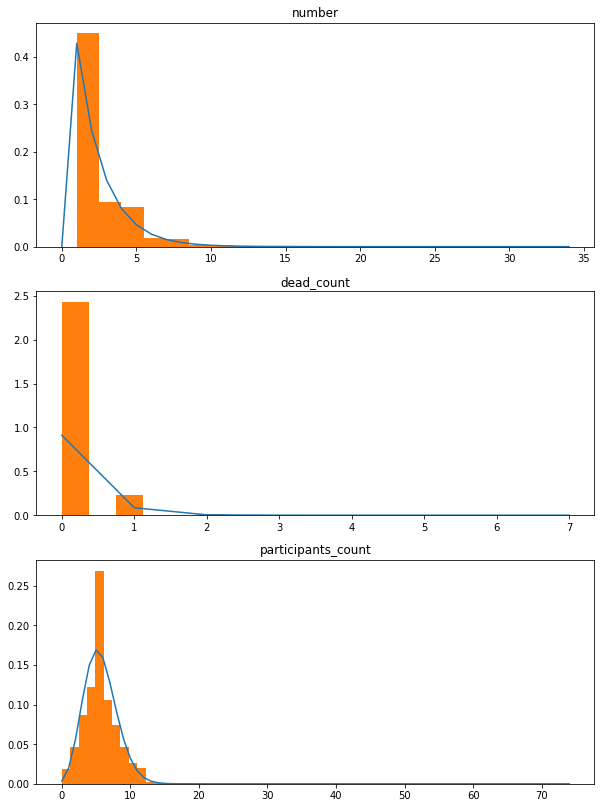

In [ ]:
import matplotlib.pyplot as plt
import random
from scipy.stats import geom, poisson, kstest

def geome(df, column):
  mean = df[column].mean()
  p = 1 / mean
  max_x = df[column].max()
  x = np.arange(0, max_x, 1)
  return x, geom.pmf(x, p), p

def pois(df, column):
  lam = df[column].mean()
  k = df[column].max()

  x = np.arange(0, k, 1)
  pdf = poisson.pmf(x, lam,loc=0)
  return x, pdf, lam



BINS  = [18,8,18]
distributions = ['geom', 'poisson', 'poisson']
targets_columns = ['number', 'dead_count' , 'participants_count' ]
num_samples = 300000


fig, axs = plt.subplots(len(targets_columns))
fig.set_size_inches(10,14)

pmfs = {}
pmfs['number'] = geome(data, 'number')
pmfs['dead_count'] = pois(data, 'dead_count')
pmfs['participants_count'] = pois(data, 'participants_count')

  
for id,item in enumerate(pmfs):

  number_samples = num_samples

  x = pmfs.get(item)[0]
  pmf = pmfs.get(item)[1]
  length = len(x)
  param = pmfs.get(item)[2]

  result = []
  level = np.amax(pmf)
  proba = 1 / length
  constant = level / proba

  while number_samples:
    index = random.randrange (0, length)
    src_bound = proba * constant
    dist_bound = pmf[index]

    if random.random() < dist_bound / src_bound:
      result.append(index)
      number_samples -= 1

  axs[id].plot(x, pmf)
  axs[id].hist(result, bins=BINS[id], density=True)
  axs[id].set_title(item)

  if item=='number':
    ks = kstest(result, 'geom', (param,))
  else:
    ks = kstest(result, 'poisson', (param,))
  print(f'for "{item}" with distribution "{distributions[id]}":')
  print(f'test res: {ks}')

plt.show()

for "number" with distribution "geom":
test res: KstestResult(statistic=0.42793451425010187, pvalue=0.0)
for "dead_count" with distribution "poisson":
test res: KstestResult(statistic=0.9107510513828752, pvalue=0.0)
for "participants_count" with distribution "poisson":
test res: KstestResult(statistic=0.1700790453522194, pvalue=0.0)


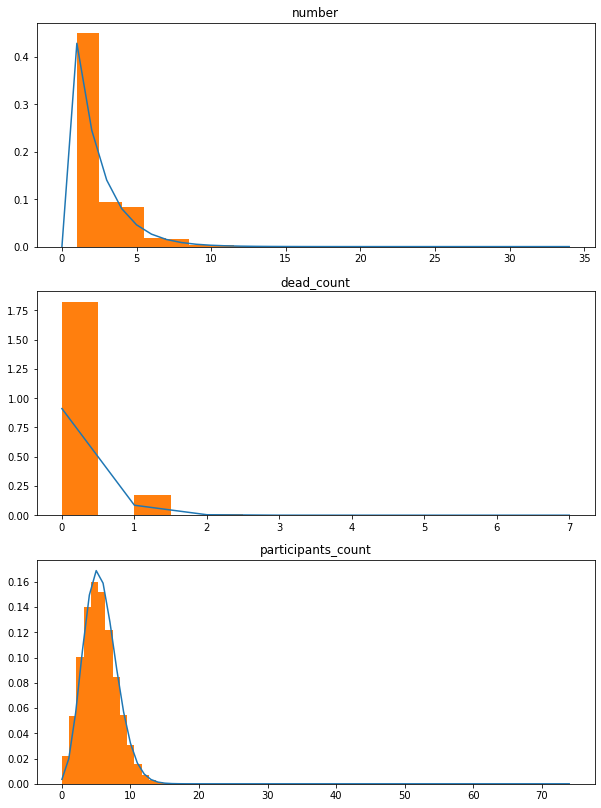

In [ ]:
def get_cdf(pmf):
  cdf = [pmf[0]]
  for i in range(1,len(pmf)):
    cdf.append( cdf[i-1] + pmf[i])
  return cdf


num_samples = 300000

cdfs = {}
fig, axs = plt.subplots(len(targets_columns))
fig.set_size_inches(10,14)


for i, item in enumerate(targets_columns):
  cdfs[item] = get_cdf(pmfs.get(item)[1])
  axs[i].plot(pmfs.get(item)[0], pmfs.get(item)[1]) 
  axs[i].set_title(item)

for id,name in enumerate(cdfs):
  number_samples = num_samples
  cdf = cdfs.get(name)
  param = pmfs.get(name)[2]
  result = []
  
  while number_samples:
    sample = random.random()
    
    for i,bar in enumerate(cdf):
      if sample < bar:
        result.append(i)
        number_samples -= 1
        break

  axs[id].hist(result, bins=BINS[id], density=True)
 
  if name=='number':
    ks = kstest(result, 'geom', (param,))
  else:
    ks = kstest(result, 'poisson', (param,))
  print(f'for "{name}" with distribution "{distributions[id]}":')
  print(f'test res: {ks}')

plt.show()

Step 3 ✔️

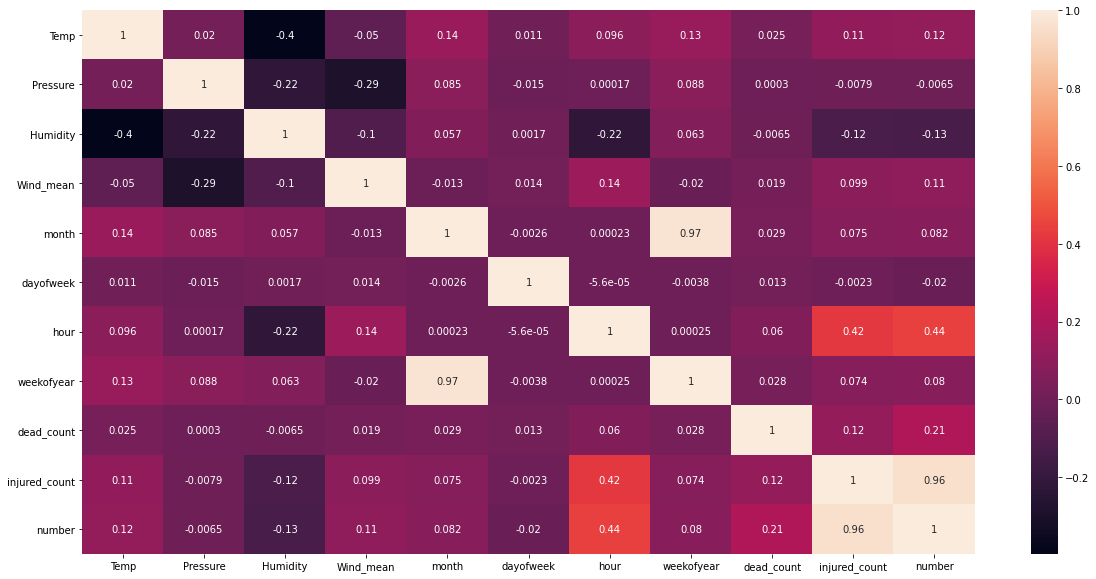

In [ ]:
# Correlation
import seaborn as sns

correlation_mat = data[p_columns+ t_columns].corr(method='spearman')
plt.figure(figsize=(20,10))
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [ ]:
# p > threshold gives us significance
# https://www.texasgateway.org/resource/124-testing-significance-correlation-coefficient-optional
# https://stackoverflow.com/a/49040342/7369463
# The more asterisks, the higher the significance is
from scipy.stats import pearsonr
import numpy as np

df = data[p_columns+ t_columns]

rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

,Temp,Pressure,Humidity,Wind_mean,month,dayofweek,hour,weekofyear,dead_count,injured_count,number
Temp,1.0***,-0.0,-0.42***,-0.03***,0.15***,0.01,0.1***,0.14***,0.02**,0.1***,0.11***
Pressure,-0.0,1.0***,-0.22***,-0.3***,0.09***,-0.02**,0.0,0.09***,-0.0,-0.01,-0.01
Humidity,-0.42***,-0.22***,1.0***,-0.07***,0.08***,0.0,-0.24***,0.08***,0.0,-0.12***,-0.13***
Wind_mean,-0.03***,-0.3***,-0.07***,1.0***,-0.01*,0.02**,0.14***,-0.02***,0.02**,0.09***,0.1***
month,0.15***,0.09***,0.08***,-0.01*,1.0***,-0.0,0.0,0.97***,0.03***,0.08***,0.09***
dayofweek,0.01,-0.02**,0.0,0.02**,-0.0,1.0***,-0.0,-0.0,0.02***,-0.01,-0.03***
hour,0.1***,0.0,-0.24***,0.14***,0.0,-0.0,1.0***,0.0,0.05***,0.34***,0.37***
weekofyear,0.14***,0.09***,0.08***,-0.02***,0.97***,-0.0,0.0,1.0***,0.03***,0.08***,0.09***
dead_count,0.02**,-0.0,0.0,0.02**,0.03***,0.02***,0.05***,0.03***,1.0***,0.16***,0.23***
injured_count,0.1***,-0.01,-0.12***,0.09***,0.08***,-0.01,0.34***,0.08***,0.16***,1.0***,0.92***


step 4

In [ ]:
# Bayesian network try 2
!pip install pgmpy

     |████████████████████████████████| 337kB 4.4MB/s 


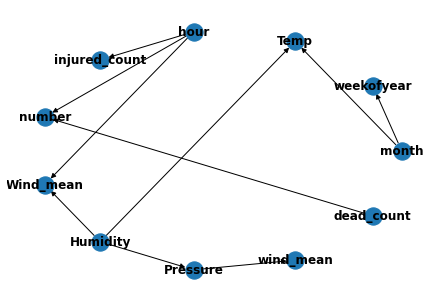

In [ ]:
from pgmpy.models import BayesianModel
import networkx as nx

# cancer_model = BayesianModel([('Temp', 'number'),
#          ('Pressure', 'number'),
#          ('Humidity', 'number'),
#          ('month', 'number'),
#          ('dayofweek', 'number'),
#          ('hour', 'number'),
#          ('weekofyear', 'number'),
#          ('Wind_mean', 'number'),
#          ('Temp', 'dead_count'),
#          ('Pressure', 'dead_count'),
#          ('Humidity', 'dead_count'),
#          ('month', 'dead_count'),
#          ('dayofweek', 'dead_count'),
#          ('hour', 'dead_count'),
#          ('weekofyear', 'dead_count'),
#          ('Wind_mean', 'dead_count'),
#          ('Temp', 'injured_count'),
#          ('Pressure', 'injured_count'),
#          ('Humidity', 'injured_count'),
#          ('month', 'injured_count'),
#          ('dayofweek', 'injured_count'),
#          ('hour', 'injured_count'),
#          ('weekofyear', 'injured_count'),
#          ('Wind_mean', 'injured_count'),         
# ])

cancer_model = BayesianModel([
         ('month', 'weekofyear'),
         ('month', 'Temp'),
         ('hour', 'injured_count'),       
         ('hour', 'number'),    
         ('Humidity', 'Temp'),               
         ('Humidity', 'Pressure'),               
         ('Pressure', 'wind_mean'),                                   
         ('hour', 'Wind_mean'),    
         ('Humidity', 'Wind_mean'),
         ('dead_count', 'number'), 
])
cancer_model

G_K2 = nx.DiGraph()
G_K2.add_edges_from(cancer_model.edges())
pos = nx.layout.circular_layout(G_K2)
nx.draw(G_K2, pos, with_labels=True,font_weight='bold')

In [ ]:
df = data[p_columns+ t_columns]
df

,Temp,Pressure,Humidity,Wind_mean,month,dayofweek,hour,weekofyear,dead_count,injured_count,number
0,2.5,763.1,64.0,2.0,2,2,21,5,0,1,1
1,4.3,761.8,54.0,4.0,2,2,18,5,0,2,2
2,3.6,760.6,71.0,3.0,2,2,15,5,2,12,8
3,3.8,759.2,68.0,3.0,2,2,12,5,1,2,2
4,0.5,758.2,90.0,2.0,2,2,9,5,0,7,6
...,...,...,...,...,...,...,...,...,...,...,...
17848,1.8,754.9,98.0,2.0,1,3,12,1,0,0,0
17849,1.6,754.9,98.0,2.0,1,3,9,1,0,1,1
17850,1.9,755.3,98.0,3.0,1,3,6,1,0,3,3
17851,1.6,755.5,98.0,2.0,1,3,3,1,0,4,2


In [ ]:
# Fitting the model using Maximum Likelihood Estimator

# from pgmpy.estimators import MaximumLikelihoodEstimator

# mle = MaximumLikelihoodEstimator(model=cancer_model, data=df)


# Estimating CPDs for all the nodes in the model
# mle.get_parameters()[:10] # Show just the first 10 CPDs in the output

In [ ]:
!pip install pgmpy
!pip install networkx

In [ ]:
for c in data.columns[1:]:
    data.fillna(value={c: data[c].mean()}, inplace=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
  0%|          | 19/1000000 [00:02<39:34:21,  7.02it/s]


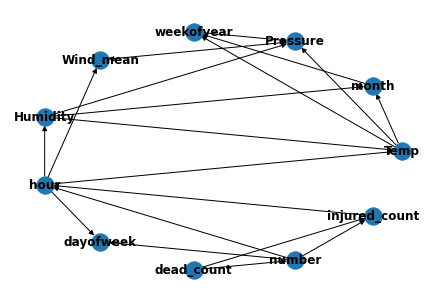

In [ ]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BDeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling
from pgmpy.base import DAG
from copy import copy
from sklearn.preprocessing import KBinsDiscretizer 
import networkx as nx

data_t = copy(data[p_columns + t_columns])
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
data_discrete = est.fit_transform(data[p_columns + t_columns])
data_t[p_columns + t_columns] = data_discrete

hc = HillClimbSearch(data_t, scoring_method=K2Score(data_t))

best_model = hc.estimate()

G_K2 = nx.DiGraph()
G_K2.add_edges_from(best_model.edges())
pos = nx.layout.circular_layout(G_K2)
nx.draw(G_K2, pos, with_labels=True,font_weight='bold')

Working for n conditional variables: 5: 100%|██████████| 5/5 [03:01<00:00, 44.54s/it]/usr/local/lib/python3.7/dist-packages/pgmpy/estimators/PC.py:369: UserWarning: Reached maximum number of allowed conditional variables. Exiting
  warn("Reached maximum number of allowed conditional variables. Exiting")
Working for n conditional variables: 5: 100%|██████████| 5/5 [03:44<00:00, 44.95s/it]
/usr/local/lib/python3.7/dist-packages/pgmpy/base/DAG.py:1011: UserWarning: PDAG has no faithful extension (= no oriented DAG with the same v-structures as PDAG). Remaining undirected PDAG edges oriented arbitrarily.
  + "oriented arbitrarily."


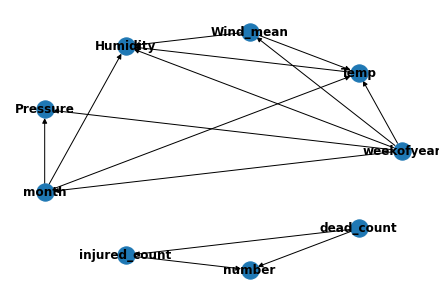

In [ ]:
from pgmpy.estimators import PC
from pgmpy.estimators import BDeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling
from pgmpy.base import DAG
from copy import copy
from sklearn.preprocessing import KBinsDiscretizer 
import networkx as nx

data_t = copy(data[p_columns + t_columns])
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
data_discrete = est.fit_transform(data[p_columns + t_columns])
data_t[p_columns + t_columns] = data_discrete

hc = PC(data_t)

best_model = hc.estimate()

G_K2 = nx.DiGraph()
G_K2.add_edges_from(best_model.edges())
pos = nx.layout.circular_layout(G_K2)
nx.draw(G_K2, pos, with_labels=True,font_weight='bold')

In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.estimators import BDeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling
from pgmpy.base import DAG
from copy import copy
from sklearn.preprocessing import KBinsDiscretizer 
import networkx as nx

data_t = copy(data[p_columns + t_columns])
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
data_discrete = est.fit_transform(data[p_columns + t_columns])
data_t[p_columns + t_columns] = data_discrete

hc = MaximumLikelihoodEstimator(data_t, scoring_method=K2Score(data_t))

best_model = hc.estimate()

G_K2 = nx.DiGraph()
G_K2.add_edges_from(best_model.edges())
pos = nx.layout.circular_layout(G_K2)
nx.draw(G_K2, pos, with_labels=True,font_weight='bold')

TypeError: ignored

Step 6

In [ ]:
# sampling 

def sampling (bn: DAG, data: pd.DataFrame, n: int = 100):
    bn_new = BayesianModel(bn.edges())
    bn_new.fit(data)
    sampler = BayesianModelSampling(bn_new)
    sample = sampler.forward_sample(size=n, return_type='dataframe')
    return sample

def draw_comparative_hist (parametr: str, original_data: pd.DataFrame, data_sampled: pd.DataFrame):
    final_df = pd.DataFrame()
    df1 = pd.DataFrame()
    df1[parametr] = original_data[parametr]
    df1['Data'] = 'Original data'
    df1['Probability'] = df1[parametr].apply(lambda x: (df1.groupby(parametr)[parametr].count()[x])/original_data.shape[0])
    df2 = pd.DataFrame()
    df2[parametr] = data_sampled[parametr]
    df2['Data'] = 'Synthetic data'
    df2['Probability'] = df2[parametr].apply(lambda x: (df2.groupby(parametr)[parametr].count()[x])/data_sampled.shape[0])
    final_df = pd.concat([df1, df2])
    sns.barplot(x=parametr, y="Probability", hue="Data", data=final_df)
    plt.show()

In [ ]:
sample_Bic = sampling(best_model, data_t, 2000)
sample_Bic[p_columns + t_columns] = est.inverse_transform(sample_Bic[p_columns + t_columns].values)

In [ ]:
for c in t_columns:
  draw_comparative_hist(c, data_t ,sample_Bic)

In [ ]:
from pgmpy.inference import VariableElimination

def accuracy_params_restoration(bn: BayesianModel, data: pd.DataFrame):
    bn.fit(data)
    result = pd.DataFrame(columns=['Parameter', 'accuracy'])
    bn_infer = VariableElimination(bn)
    for j, param in enumerate(data.columns):
        accuracy = 0
        test_param = data[param]
        test_data = data.drop(columns=param)
        evidence = test_data.to_dict('records')
        predicted_param = []
        for element in evidence:
            prediction = bn_infer.map_query(variables=[param], evidence=element)
            predicted_param.append(prediction[param])
        accuracy = accuracy_score(test_param.values, predicted_param)
        result.loc[j,'Parameter'] = param
        result.loc[j, 'accuracy'] = accuracy
    return result

In [ ]:
accuracy = accuracy_params_restoration(BayesianModel(best_model.edges()), data_t)

In [ ]:
accuracy

In [ ]:
for c in t_columns:
    sns.distplot(data[c], label='Original data')
    sns.distplot(sample_Bic[c], label='Generated data')
    plt.legend()
    plt.show()